In [19]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

신경망에서 흔히 사용되는 최적화 방법인 확률적 경사하강법(Stochastic Gradient Descent - SGD)에 대해서 알아보겠습니다. 우리는 구체적인 예를 들어 개념들을 설명할 것이다.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

선형 회귀는 점 세트에 맞는 선을 찾는 것이 목표입니다.

In [20]:
n=100

In [21]:
x = torch.ones(n,2) 

In [22]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.8534,  1.0000],
        [ 0.9636,  1.0000],
        [ 0.8269,  1.0000],
        [-0.2921,  1.0000],
        [ 0.9244,  1.0000]])

In [23]:
a = tensor(3.,2); a

tensor([3., 2.])

In [24]:
y = x@a + torch.rand(n)

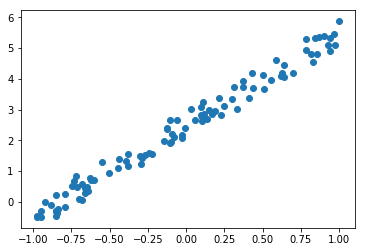

In [25]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

점과 선 x@a 사이의 오류를 최소화하는 매개변수(가중치)를 찾으려는 경우. 여기서 a는 알 수 없다는 것을 주목하라. 회귀 문제의 경우 가장 일반적인 오류 함수 또는 손실 함수는 평균 제곱 오차이다.

In [26]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

a = (-1.0,1.0)를 믿는다고 가정하면, 우리의 예측인 y_hat을 계산하고 오류를 계산할 수 있습니다.

In [27]:
a = tensor(-1.,1)

In [28]:
y_hat = x@a
mse(y_hat, y)

tensor(7.2924)

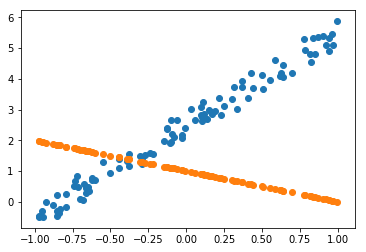

In [29]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

지금까지 모델(선형 회귀)과 평가 기준(또는 손실 함수)을 명시했습니다. 이제 최적화를 다루어야 합니다. 최적화란, a에 대한 최선의 가치를 어떻게 찾을 것인가? 가장 적합한 선형 회귀 분석을 어떻게 찾는가? 를 말합니다.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

우리는 mse_loss를 최소화하는 a 값를 찾고자 합니다

**Gradient descent** 은 기능을 최소화하는 알고리즘이다. 매개변수 집합에 의해 정의되는 함수를 고려할 때, 경사 하강은 매개변수 값의 초기 집합으로 시작하고 반복적으로 기능을 최소화하는 매개변수 값 집합으로 이동합니다. 이 반복적 최소화는 기능 구배의 부정적인 방향으로 조치를 취함으로써 달성됩니다.

다음은 [PyTorch](http://pytorch.org/)에서 구현된 Gradient descent입니다.

In [30]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [31]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [32]:
lr = 1e-1
for t in range(100): update()

tensor(7.2924, grad_fn=<MeanBackward0>)
tensor(1.4579, grad_fn=<MeanBackward0>)
tensor(0.3914, grad_fn=<MeanBackward0>)
tensor(0.1417, grad_fn=<MeanBackward0>)
tensor(0.0824, grad_fn=<MeanBackward0>)
tensor(0.0684, grad_fn=<MeanBackward0>)
tensor(0.0650, grad_fn=<MeanBackward0>)
tensor(0.0642, grad_fn=<MeanBackward0>)
tensor(0.0640, grad_fn=<MeanBackward0>)
tensor(0.0640, grad_fn=<MeanBackward0>)


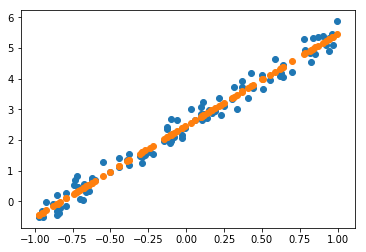

In [33]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [34]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [36]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=70)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

실제론 전체 데이터를 한번에 계산하지 않고, *mini-batches* 를 사용합니다.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

분류 문제에 대해서는 *부정 로그 우도 손실*이라고도 하는 *cross entropy loss*을 사용한다. 이것은 잘못된 예측을 처벌하고, 확실하지 않은 예측을 바로잡는다